Repeat of the experiment done in 

**Learning long-term dependencies with gradient descent is difficult**

https://dl.acm.org/citation.cfm?id=2328340

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
import numpy as np

from keras.models import Model
from keras.layers import Input, LSTM, Dense, SimpleRNN
from keras.utils.vis_utils import plot_model
from keras import backend as K

/projects/btl2/zxue/miniconda3/envs/venv-tf-cpu/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
N = 10000
num_epochs = 30
# sequence length options
lens = [2, 5, 8, 10, 15, 20, 25, 30] + np.arange(30, 210, 10).tolist()

res = {}
for (RNN_CELL, key) in zip([SimpleRNN, LSTM], ['srnn', 'lstm']):
    res[key] = {}
    print(key, end=': ')
    for seq_len in lens:
        print(seq_len, end=',')
        xs = np.zeros((N, seq_len))
        ys = np.zeros(N)

        # construct input data
        positive_indexes = np.arange(N // 2)
        negative_indexes = np.arange(N // 2, N)

        xs[positive_indexes, 0] = 1
        ys[positive_indexes] = 1

        xs[negative_indexes, 0] = -1
        ys[negative_indexes] = 0

        noise = np.random.normal(loc=0, scale=0.1, size=(N, seq_len))

        train_xs = (xs + noise).reshape(N, seq_len, 1)
        train_ys = ys

        # train for multiple epochs
        hists = []
        for i in range(num_epochs):
            inputs = Input(shape=(None, 1), name='input')
            # rnn = SimpleRNN(1, input_shape=(None, 1), name='rnn')(inputs)
            rnn = RNN_CELL(1, input_shape=(None, 1), name='rnn')(inputs)
            out = Dense(2, activation='softmax', name='output')(rnn)
            model = Model(inputs, out)
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            hist = model.fit(train_xs, train_ys, epochs=5, shuffle=True, validation_split=0.2, batch_size=16, verbose=0)
            hists.append(hist.history['val_acc'][-1])
        res[key][seq_len] = hists
    print()

srnn: 2,5,8,10,15,20,25,30,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,
lstm: 2,5,8,10,15,20,25,30,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,


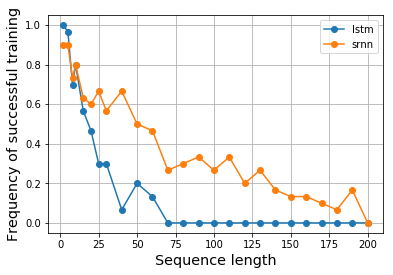

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pd.DataFrame.from_dict(res['lstm']).mean(), 'o-', label='lstm')
ax.plot(pd.DataFrame.from_dict(res['srnn']).mean(), 'o-', label='srnn')
ax.set_xlabel('Sequence length')
ax.set_ylabel('Frequency of successful training')
ax.legend()
ax.grid()